In [ ]:
import warnings
warnings.filterwarnings('ignore')

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def rename_distr(data):
    data.distribution[data.distribution=='Agent_based_normal'] = 'ABN'
    data.distribution[data.distribution=='Agent_based_uniform'] = 'ABU'
    data.distribution[data.distribution=='F_distribution'] = 'F'
    data.distribution[data.distribution=='Laplace_or_double_exponential'] = 'Laplace'# r'$\beta$'
    data.distribution[data.distribution=='Modified_uniform_distribution'] = 'MU'
    data.distribution[data.distribution=='Normal_distribution'] = r'Normal'
    data.distribution[data.distribution=='Rayleigh_distribution'] = 'Rayleigh'
    data.distribution[data.distribution=='SVA_BETA_distribution'] = r'SVA-$\beta$'
    data.distribution[data.distribution=='Weibull_distribution'] = 'Weibull'
    data.distribution[data.distribution=='Weighted_random_with_chisquare'] = 'WRC'
    return data

## Summarize Quantum Annealing Results

### 2 and 3 agents

In [3]:
filepath=os.path.join("output","12","QAOA_QA_23", "all_results.csv")
full_data=pd.read_csv(filepath)

data = full_data[(full_data.device =="dwave") & (full_data.flag==True) ]
data = data.sort_values('rank', axis=0).drop_duplicates(subset=['distribution', 'n_agents'], keep='first')
data = data.drop(['solution', 'p', 'time_bilp', 'flag'], axis = 1)
data_23 = data.sort_values(['distribution', 'n_agents'], axis=0).reset_index(drop=True)

### From 4 to 7 agents

In [4]:
folder = os.path.join('output', '12', 'QA_hyper_params_47')
file = 'all_results.csv'

current_folder = folder + f'_{3}'
file_path = os.path.join(current_folder, file)

full_data = pd.read_csv(file_path)

for i in range(4,8):
    current_filepath = os.path.join(folder + f'_{i}', file)
    full_data = full_data.append(pd.read_csv(current_filepath))
full_data = full_data.drop(['solution', 'p', 'time_bilp', 'flag'], axis = 1)

In [5]:
data_47 = full_data.sort_values('rank', axis=0).drop_duplicates(subset=['distribution', 'n_agents'], keep='first')
data = data_23.append(data_47)
data = data.sort_values(['distribution', 'n_agents'])

data = rename_distr(data)
data.head(7)

,distribution,n_agents,fval,prob,rank,time,device,penalty
0,ABN,2,-2.089340e+02,0.351,2,93.98,dwave,100
1,ABN,3,-3.116050e+02,0.219,1,134.96,dwave,100
4,ABN,4,-4.016953e+03,0.017,4,137.14,dwave,1000
5,ABN,5,-5.000171e+05,0.001,3,138.40,dwave,100000
6,ABN,6,-1.000050e+06,0.001,1,139.30,dwave,1000000
7,ABN,7,4.199988e+07,0.001,1,239.64,dwave,1000000
2,ABU,2,-2.087120e+02,0.571,1,95.40,dwave,100


In [6]:
# data_mean = data.groupby(['distribution', 'n_agents']).mean()
# data_mean.reset_index(inplace=True)
# # data_mean.sort_values(['distribution', 'n_agents']).head()

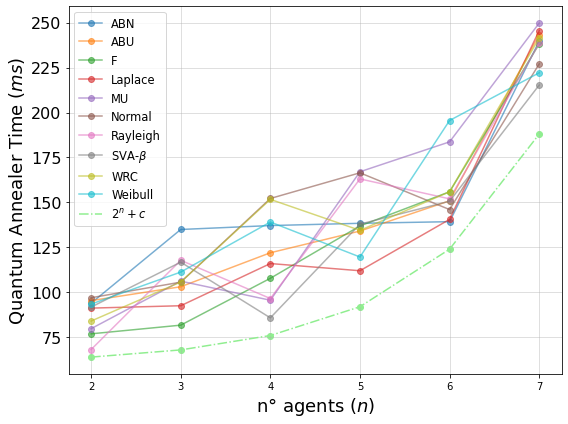

In [7]:
font=18

fig, ax = plt.subplots(figsize=(8,6))
for i, g in data.groupby('distribution'):
    g.plot(x='n_agents', y='time', ax=ax, label=str(i), style='o-', alpha=.6)#, marker='8', markersize=8, alpha=.6)#, yerr='std_acc')
#     plt.fill_between(x=g['n_agents'], y1 = g['time'] - g['std'], y2 = g['time'] + g['std'], alpha=0.2)

plt.grid(alpha=0.5)
plt.ylabel(r'Quantum Annealer Time ($ms$)',fontdict={'fontsize':font})
plt.yticks(fontsize=16)
plt.xlabel(r'n° agents $(n)$',fontdict={'fontsize':font})


n = np.arange(2,8)
plt.plot(n, 2**n+60,  linestyle = 'dashdot', color='lightgreen', label=r'$2^n+c$')
plt.scatter(n, 2**n+60,  color='lightgreen', label=None)


plt.legend(fontsize=11.5)#bbox_to_anchor=(.5, -0.35), loc='lower center', fontsize=24, ncol=5, borderaxespad=0.1)
plt.tight_layout()

plt.savefig('output/QA.png')

## Collect results from QAOA

In [8]:
filepath=os.path.join("output","12","QAOA_QA_23", "all_results.csv")
full_data=pd.read_csv(filepath)

data = full_data[(full_data.device =="QAOA") & (full_data.flag==True) ]
data = data.sort_values('rank', axis=0).drop_duplicates(subset=['distribution', 'n_agents'], keep='first')

In [9]:
cols_to_drop = ['solution', 'fval', 'prob', 'rank', 'flag', 'device', 'penalty']

data_2 = data[data.n_agents==2].drop(cols_to_drop, axis=1)
data_2 = data_2.sort_values('distribution', axis=0).reset_index(drop=True)

data_3 = data[data.n_agents==3].drop(cols_to_drop, axis=1)
data_3 = data_3.sort_values('distribution', axis=0).reset_index(drop=True)

In [10]:
data = pd.merge(data_2, data_3, on=['distribution'], suffixes = ['_2', '_3'])
data = data.drop(['n_agents_2', 'n_agents_3'], axis=1)

In [12]:
data = rename_distr(data)

data.p_2 = data.p_2.astype(int)
data.p_3 = data.p_3.astype(int)


print(data.round(3).to_latex(index=False))

\begin{tabular}{lrrrrrr}
\toprule
distribution &  p\_2 &  time\_2 &  time\_bilp\_2 &  p\_3 &  time\_3 &  time\_bilp\_3 \\
\midrule
         ABN &    1 &   0.033 &        0.062 &   17 &   3.133 &        0.517 \\
         ABU &    1 &   0.034 &        0.062 &   10 &   1.642 &        0.624 \\
           F &    3 &   0.086 &        0.063 &    7 &   0.910 &        0.588 \\
     Laplace &    1 &   0.120 &        0.065 &   11 &   2.026 &        0.608 \\
          MU &    1 &   0.029 &        0.060 &   10 &   2.360 &        0.641 \\
      Normal &    1 &   0.043 &        0.102 &    2 &   0.490 &        0.576 \\
    Rayleigh &    5 &   0.173 &        0.062 &   12 &   2.491 &        0.603 \\
 SVA-\$\textbackslash beta\$ &    2 &   0.053 &        0.080 &    6 &   0.883 &        0.567 \\
     Weibull &    1 &   0.042 &        0.070 &    6 &   1.499 &        0.601 \\
         WRC &    2 &   0.055 &        0.068 &    6 &   1.582 &        0.529 \\
\bottomrule
\end{tabular}



In [ ]:
import ast

filepath=os.path.join("output","12","QAOA_QA_23", "all_results.csv")
full_data=pd.read_csv(filepath)

decoded_solutions = []
for row in full_data.iterrows():
    if row[1]['flag']:
        solution = row[1]['solution']
        if ',' not in solution: solution = solution.replace('.',',')
        solution = ast.literal_eval(solution)
        temp = []
        for y,qubit in enumerate(solution):
            y+=1
            if int(qubit):
                temp.append(','.join([str(idx+1) for idx,bit in enumerate(bin(y)[2:][::-1]) if int(bit)]))
        decoded_solutions.append(temp)
    else:
        decoded_solutions.append(None)
full_data['decoded_solutions'] = decoded_solutions
full_data.to_csv(os.path.join("output","12","QAOA_QA_23", "all_results_decoded.csv"))